In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

[(300, 2), (300, 3)]


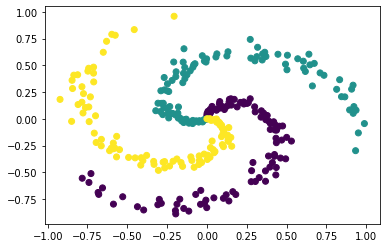

In [2]:
# Data preparation
from dataset import spiral
x, t = spiral.load_data()
print(list(map(lambda x: np.array(x).shape, [x, t])))
plt.scatter(x[:,0], x[:,1], c=np.argmax(t, axis=1))

In [3]:
from common.functions import softmax, sigmoid, cross_entropy_error
from common.gradient import numerical_gradient

epoch=130 accuracy=0.6533333333333333


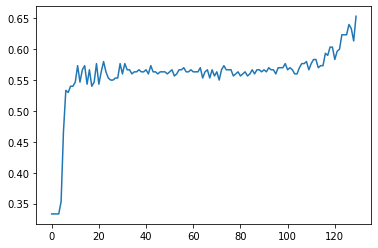

CPU times: user 26.9 s, sys: 132 ms, total: 27 s
Wall time: 26.8 s


In [25]:
%%time

# NN structure
hidden = 10
W1 = 0.01 * np.random.randn(len(x[0]), hidden)
b1 = np.zeros(1)
W2 = 0.01 * np.random.randn(hidden, len(t[0]))
b2 = np.zeros(1)

# Basic functions
def predict(x):
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    return y

def loss(x, t):
    y = predict(x)
    return cross_entropy_error(y, t)

def update_params(x, t):
    params = [W1, b1, W2, b2]
    f = lambda p: loss(x, t)
    grads = [numerical_gradient(f, p) for p in params]
    for g, p in zip(grads, params):
        p -= lr * g
        
def accuracy(x, t):
    y = predict(x)
    y, t = y.argmax(axis=1), t.argmax(axis=1)
    return (y==t).sum() / len(y)

# Hyper parameters
epochs = 300
batch = 10
lr = 1.

# Train NN
accu_list = []
for epoch in range(epochs):
    idx = np.random.permutation(len(x))
    x, t = x[idx], t[idx]
    _loss = 0
    for n in range(len(x)//batch):
        idx = range(n*batch, (n+1)*batch)
        xx, tt = x[idx], t[idx]
        update_params(xx, tt)
    accu_list.append(accuracy(x, t))
    if accu_list[-1] >= 0.65:
        break

# Plot accuracy over time        
print(f"epoch={len(accu_list)} accuracy={accu_list[-1]}")
plt.plot(range(len(accu_list)), accu_list)
plt.show()